<a href="https://colab.research.google.com/github/Sowmya-2348562/Deep-Learning/blob/main/2348562_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
path="C:\\Users\\Sowmya C\\Downloads\\Skin-cancer"
cancer=[]
for j in os.listdir(path):
    if j.split('.')[-1]=='jpg':
        img=cv2.imread(os.path.join(path,j))
        img=cv2.resize(img,(200,200))
        image.append(img)
        cancer.append(j)
plt.figure(figsize=(12,8))
c=1
for i in range(0,len(image)):
    plt.subplot(3,3,c)
    plt.imshow(np.array(cv2.cvtColor(image[i],cv2.COLOR_BGR2RGB)))
    plt.title(cancer[i])
    plt.axis('off')
    c+=1

<Figure size 1200x800 with 0 Axes>

In [ ]:
path = "C:\\Users\\Sowmya C\\Downloads\\Skin-cancer\\train"
classes = {'benign': 0, 'malignant': 1}
X = []
Y = []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        if j.split('.')[-1]=='jpg':
            img = cv2.imread(os.path.join(pth, j))
            img = cv2.resize(img, (200, 200))
            X.append(img)
            Y.append(classes[cls])

In [ ]:
path = "C:\\Users\\Sowmya C\\Downloads\\Skin-cancer\\test"
classes = {'benign': 0, 'malignant': 1}
X_test = []
Y_test = []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        if j.split('.')[-1]=='jpg':
            img = cv2.imread(os.path.join(pth, j))
            img = cv2.resize(img, (200, 200))
            X_test.append(img)
            Y_test.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X = X.reshape(X.shape[0], 200, 200, 3)
X_test = X_test.reshape(X_test.shape[0], 200, 200, 3)
X=X.astype('float32')
X_test=X_test.astype('float32')
X/=255
X_test/=255
from tensorflow.keras.utils import to_categorical
Y, Y_test = to_categorical(Y), to_categorical(Y_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,stratify=Y,test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.layers import BatchNormalization, RandomFlip,RandomRotation,RandomZoom, Input
model1 = Sequential([
    Input(shape=(200,200,3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)])
# convolutional layer
model1.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
# convolutional layer
model1.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
# flatten output of conv
model1.add(Flatten())

# hidden layer
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))

# output layer
model1.add(Dense(2, activation='softmax'))

In [ ]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)             │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 100, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50, 50, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 25, 25, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 19,528,898 (74.50 MB)

 Trainable params: 19,527,938 (74.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history1=model1.fit(X_train, Y_train, batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 67s 872ms/step - accuracy: 0.6791 - loss: 7.1626 - val_accuracy: 0.5549 - val_loss: 4.9189
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 55s 837ms/step - accuracy: 0.7013 - loss: 5.2898 - val_accuracy: 0.4545 - val_loss: 7.0841
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 55s 833ms/step - accuracy: 0.6830 - loss: 2.4623 - val_accuracy: 0.5455 - val_loss: 3.4386
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 56s 854ms/step - accuracy: 0.7491 - loss: 0.5951 - val_accuracy: 0.5473 - val_loss: 4.0810
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 55s 832ms/step - accuracy: 0.7748 - loss: 0.4916 - val_accuracy: 0.6117 - val_loss: 1.8796
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 53s 800ms/step - accuracy: 0.7218 - loss: 0.5671 - val_accuracy: 0.5492 - val_loss: 2.8572
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 54s 823ms/step - accuracy: 0.7521 - loss: 0.5197 - val_accuracy: 0.7254 - val_loss: 0.6702
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 865ms/step - accuracy: 0.7742 - loss: 0.4655 - val_accu

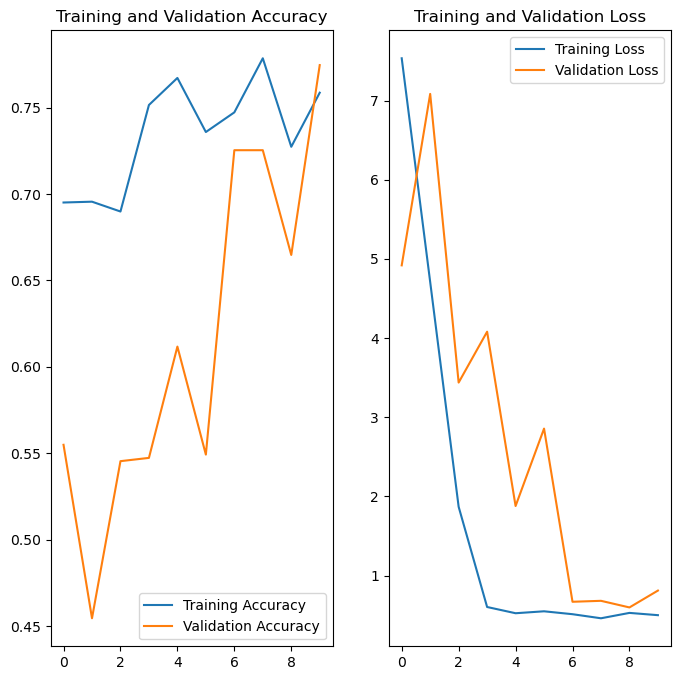

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16
model_vgg16 = VGG16(input_shape=(200,200,3), include_top=False, weights='imagenet')

In [ ]:
for layer in model_vgg16.layers:
   layer.trainable=False
model_vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 200, 200, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 200, 200, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 100, 100, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 100, 100, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 50, 50, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 25, 25, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model = Sequential()
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, Y_train, batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - accuracy: 0.6179 - loss: 1.2963 - val_accuracy: 0.8504 - val_loss: 0.3435
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 230s 4s/step - accuracy: 0.7863 - loss: 0.4664 - val_accuracy: 0.8428 - val_loss: 0.3345
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.8119 - loss: 0.4220 - val_accuracy: 0.8428 - val_loss: 0.3153
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.8039 - loss: 0.3987 - val_accuracy: 0.8485 - val_loss: 0.2993
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 274s 4s/step - accuracy: 0.8292 - loss: 0.3867 - val_accuracy: 0.8466 - val_loss: 0.2803
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 279s 4s/step - accuracy: 0.8113 - loss: 0.3626 - val_accuracy: 0.8542 - val_loss: 0.2830
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 329s 5s/step - accuracy: 0.8220 - loss: 0.3355 - val_accuracy: 0.8542 - val_loss: 0.2826
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 459s 7s/step - accuracy: 0.8140 - loss: 0.3565 - val_accuracy: 0.8712 - v

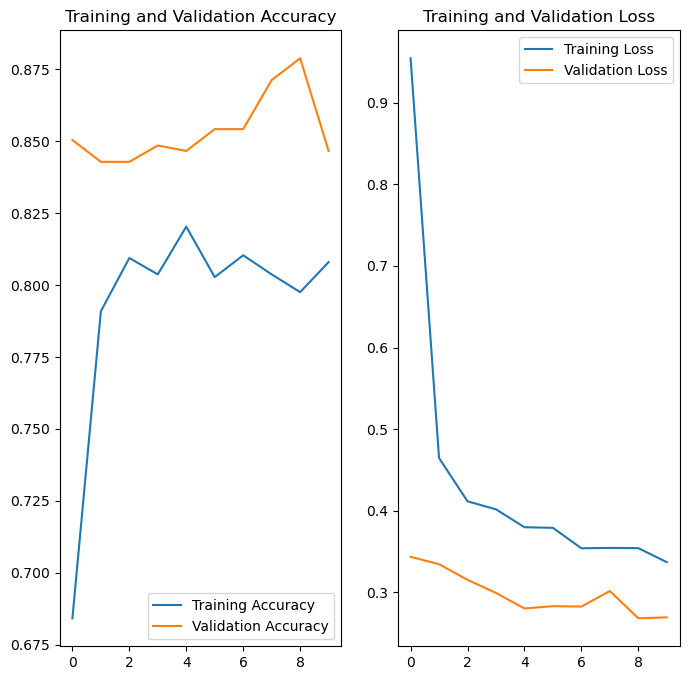

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


[1. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
According to custom-CNN this image most likely belongs to Benign 
According to VGG16 this image most likely belongs to Benign 


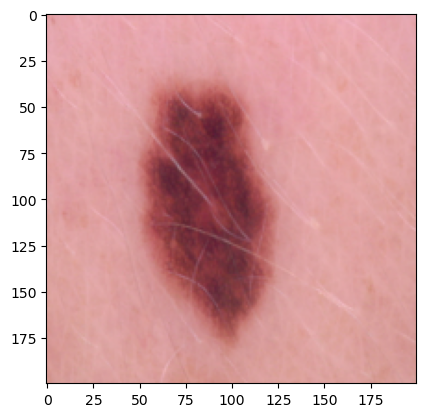

In [ ]:
import tensorflow as tf
import random
class_names=['Benign','Malignant']
number=random.randint(0,X_test.shape[0])
img_array=np.expand_dims(X_test[number], axis=0)
print(Y_test[number])
predictions = model1.predict(img_array)
score = tf.nn.softmax(predictions[0])
predictions = model.predict(img_array)
score1 = tf.nn.softmax(predictions[0])
plt.imshow(np.array(cv2.cvtColor(X_test[number],cv2.COLOR_BGR2RGB)))
print(
    "According to custom-CNN this image most likely belongs to {} "
    .format(class_names[np.argmax(score)]))
print(
    "According to VGG16 this image most likely belongs to {} "
    .format(class_names[np.argmax(score1)]))

In [ ]:
y_pred = model1.predict(X_test)
y_pred1=model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes1=np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_test, axis=1)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
conf_matrix1 = confusion_matrix(y_true, y_pred_classes1)
print('Custom CNN:\n',conf_matrix)
print('VGG16:\n',conf_matrix1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step
Custom CNN:
 [[240 120]
 [ 32 268]]
VGG16:
 [[288  72]
 [ 29 271]]


In [ ]:
from sklearn.metrics import classification_report
print('Custom CNN:\n',classification_report(y_true, y_pred_classes))
print('VGG16:\n',classification_report(y_true, y_pred_classes1))

Custom CNN:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76       360
           1       0.69      0.89      0.78       300

    accuracy                           0.77       660
   macro avg       0.79      0.78      0.77       660
weighted avg       0.80      0.77      0.77       660

VGG16:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85       360
           1       0.79      0.90      0.84       300

    accuracy                           0.85       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.85      0.85      0.85       660



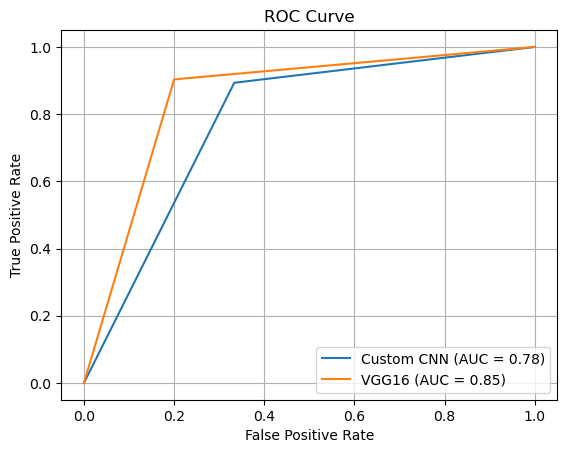

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_model1, tpr_model1, _ = roc_curve(y_true, y_pred_classes)
roc_auc_model1 = roc_auc_score(y_true, y_pred_classes)
fpr_model2, tpr_model2, _ = roc_curve(y_true, y_pred_classes1)
roc_auc_model2 = roc_auc_score(y_true, y_pred_classes1)
plt.plot(fpr_model1, tpr_model1, label='Custom CNN (AUC = {:.2f})'.format(roc_auc_model1))
plt.plot(fpr_model2, tpr_model2, label='VGG16 (AUC = {:.2f})'.format(roc_auc_model2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()